In [7]:
import pandas as pd
import numpy as np


In [8]:
item = pd.read_csv('./data/on_items.csv', encoding='cp949', )

In [9]:
item.head()

,ItemLargeCode,ItemLargeName,ItemMiddleCode,Unnamed: 3,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax,이상치?,Unnamed: 12,0,59
0,L1,가공식품,M17,수산,S0380,생선,L1-M17-S0380-1123,펭귄 꽁치통조림 400g x 12캔 / 꽁치캔 통조림,2024,38590.0,41390,NaN,NaN,NaN,NaN
1,L1,가공식품,M17,수산,S0380,생선,L1-M17-S0380-1009,[동원] 건강한 6호 선물세트 /참치 통조림 햄,2024,38540.0,41340,NaN,NaN,NaN,NaN
2,L1,가공식품,M17,수산,S0100,김,L1-M17-S0100-1097,동원 양반 구운김밥김 전장김 10매*30봉,2024,38520.0,41320,NaN,NaN,NaN,NaN
3,L1,가공식품,M17,수산,S0030,고등어,L1-M17-S0030-1057,안동간고등어 순살/반마리/HACCP/180gx10팩/개별포장,2024,38500.0,41300,NaN,NaN,NaN,NaN
4,L1,가공식품,M17,수산,S0100,김,L1-M17-S0100-1125,새우표 완도 오리지널 전장김 25g x 40봉,2024,38500.0,41300,NaN,NaN,NaN,NaN


In [ ]:
item

In [6]:
item['ItemMiddleName'].value_counts()

KeyError: 'ItemMiddleName'

In [ ]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054 entries, 0 to 10053
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ItemLargeCode   10054 non-null  object
 1   ItemLargeName   10054 non-null  object
 2   ItemMiddleCode  10054 non-null  object
 3   ItemMiddleName  10054 non-null  object
 4   ItemSmallCode   10054 non-null  object
 5   ItemSmallName   10054 non-null  object
 6   ItemCode        10054 non-null  object
 7   ItemName        10054 non-null  object
 8   PriceYear       10054 non-null  int64 
 9   PriceMin        10054 non-null  int64 
 10  PriceMax        10054 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 864.1+ KB


In [117]:
df_order = pd.read_csv('./data/on_orders_.csv', encoding = 'cp949')

In [121]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855365 entries, 0 to 855364
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   idUser      855365 non-null  object
 1   idOrder     855365 non-null  object
 2   OrderDT     855365 non-null  object
 3   ItemCode    855365 non-null  object
 4   Price       855365 non-null  int64 
 5   DeliveryDT  855365 non-null  object
dtypes: int64(1), object(5)
memory usage: 39.2+ MB


In [124]:
# 날짜 형식 명시적으로 지정
df_order['OrderDT'] = pd.to_datetime(df_order['OrderDT'], format="%d%b%Y:%H:%M:%S")


In [125]:
df_order['OrderDT'] = pd.to_datetime(df_order['OrderDT'])
df_order['OrderMonth'] = df_order['OrderDT'].dt.to_period('M')  # 월 단위


In [126]:
# 주문 데이터에서 'OrderDT'와 'ItemCode' 포함된 상태라고 가정
df_order['OrderMonth'] = df_order['OrderDT'].dt.to_period('M')

# 월별 고유 상품 수
monthly_item_count = df_order.groupby('OrderMonth')['ItemCode'].nunique().reset_index()
monthly_item_count.columns = ['Month', 'UniqueSoldItems']
monthly_item_count['Month'] = monthly_item_count['Month'].dt.to_timestamp()


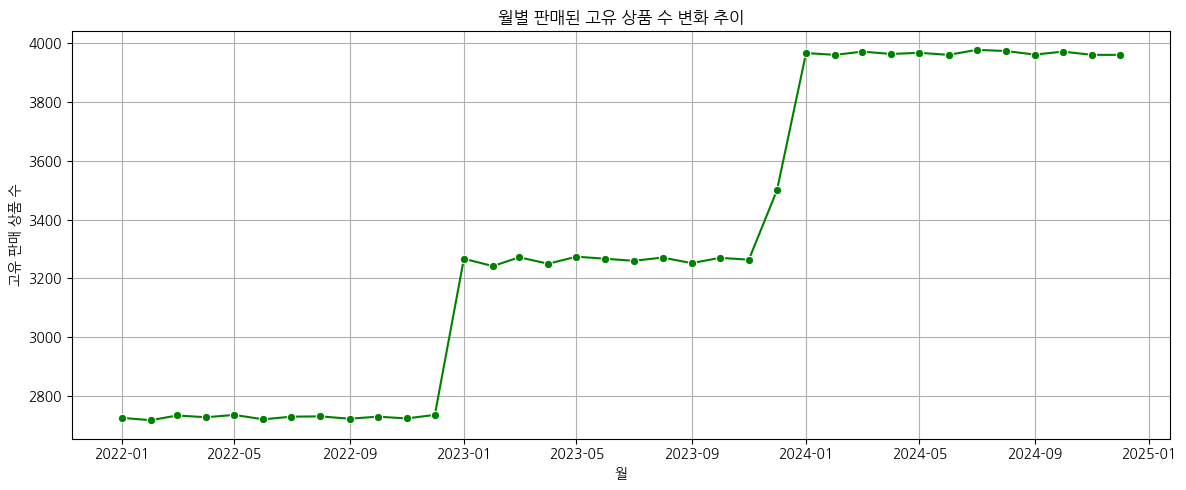

In [128]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Month', y='UniqueSoldItems', data=monthly_item_count, marker='o', color='green')

plt.title('월별 판매된 고유 상품 수 변화 추이')
plt.xlabel('월')
plt.ylabel('고유 판매 상품 수')
plt.grid(True)
plt.tight_layout()
plt.show()


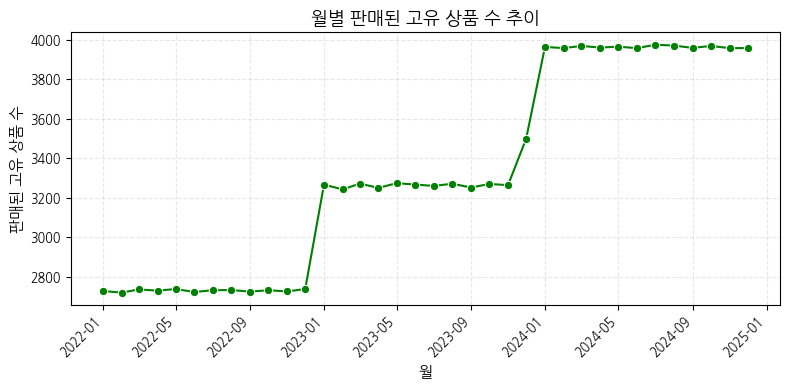

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정 (가로폭 줄이기)
plt.figure(figsize=(8, 4))  # ⬅️ 가로폭 줄임

sns.lineplot(x='Month', y='UniqueSoldItems', data=monthly_item_count, marker='o', color='green')

plt.title('월별 판매된 고유 상품 수 추이', fontsize=13)
plt.xlabel('월', fontsize=11)
plt.ylabel('판매된 고유 상품 수', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=9)  # ⬅️ 글자가 겹치지 않게 살짝 기울이기
plt.yticks(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [1]:
monthly_item_count

NameError: name 'monthly_item_count' is not defined

## 배송지연예측 모델링

In [45]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 파일 경로 지정
file_path = './data/df_clean (1).csv'

# 파일 읽기 (날짜형 컬럼 자동 파싱 시도)
df = pd.read_csv(file_path, parse_dates=['OrderDT', 'DeliveryDT'])

# 데이터프레임 크기 및 샘플 확인
print(df.shape)
print(df.head(3))


(856727, 32)
   idUser Gender  Age AgeGroup  FamilyCount MemberYN            idOrder  \
0  U10001     여성   26      20대            2        Y  U10001-O2022-1002   
1  U10001     여성   26      20대            2        Y  U10001-O2022-1002   
2  U10001     여성   26      20대            2        Y  U10001-O2022-1002   

              OrderDT  OrderMonth  OrderDay  ...          DeliveryDT  \
0 2022-01-06 17:08:00           1         6  ... 2022-01-07 06:24:00   
1 2022-01-06 17:08:00           1         6  ... 2022-01-07 06:24:00   
2 2022-01-06 17:08:00           1         6  ... 2022-01-07 06:24:00   

   Deli_Year  Deli_Month Deli_Day Deli_Hour Deli_Minute Deli_Second  \
0       2022           1        7         6          24           0   
1       2022           1        7         6          24           0   
2       2022           1        7         6          24           0   

     Deli_Duration  Deli_Hours  IsMorningDelivery  
0  0 days 13:16:00   13.266667                  1  
1  0 day

In [46]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856727 entries, 0 to 856726
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idUser             856727 non-null  object        
 1   Gender             856727 non-null  object        
 2   Age                856727 non-null  int64         
 3   AgeGroup           856727 non-null  object        
 4   FamilyCount        856727 non-null  int64         
 5   MemberYN           856727 non-null  object        
 6   idOrder            856727 non-null  object        
 7   OrderDT            856727 non-null  datetime64[ns]
 8   OrderMonth         856727 non-null  int64         
 9   OrderDay           856727 non-null  int64         
 10  OrderHour          856727 non-null  int64         
 11  OrderMinute        856727 non-null  int64         
 12  OrderSecond        856727 non-null  int64         
 13  ItemCode           856727 non-null  object  

In [48]:
df.drop(['IsMorningDelivery', 'OrderMonth', 'OrderDay', 'OrderHour', 'OrderMinute', 'OrderSecond', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours'], axis=1, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856727 entries, 0 to 856726
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   idUser          856727 non-null  object        
 1   Gender          856727 non-null  object        
 2   Age             856727 non-null  int64         
 3   AgeGroup        856727 non-null  object        
 4   FamilyCount     856727 non-null  int64         
 5   MemberYN        856727 non-null  object        
 6   idOrder         856727 non-null  object        
 7   OrderDT         856727 non-null  datetime64[ns]
 8   ItemCode        856727 non-null  object        
 9   ItemLargeName   856727 non-null  object        
 10  ItemMiddleName  856727 non-null  object        
 11  ItemSmallName   856727 non-null  object        
 12  ItemName        856727 non-null  object        
 13  Price           856727 non-null  int64         
 14  PriceYear       856727 non-null  int

In [50]:
# 1. 배송 지연 여부 판단 함수
from datetime import timedelta

def check_delivery(order, delivery):
    order_hour = order.hour
    order_weekday = order.weekday()  # 월=0, ..., 일=6

    if order_weekday == 4 and order_hour >= 21:  # 금요일 21시 이후
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=3)
    elif order_weekday == 6 and order_hour >= 21:  # 일요일 21시 이후
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
    elif (order_weekday == 5) or (order_weekday == 6 and order_hour < 21):
        if order_weekday == 5:  # 토요일
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        else:  # 일요일 21시 이전
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
    else:
        if order_hour < 21:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        else:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)

    return 0 if delivery <= deadline else 1

# 2. 냉장/냉동/상온 파생 변수용 중분류 매핑
def map_storage_type(middle_name):
    냉동 = ['냉동', '수산']
    냉장 = ['신선', '축산', '과일', '채소']
    상온 = ['곡물', '과자', '음료', '탄산', '생수', '커피', '즉석', '양념']
    
    if pd.isnull(middle_name): return '기타'
    for 키, 값 in {'냉동': 냉동, '냉장': 냉장, '상온': 상온}.items():
        if any(카테고리 in middle_name for 카테고리 in 값):
            return 키
    return '기타'

# 3. 파생 피처 생성
df['OrderHour'] = df['OrderDT'].dt.hour
df['OrderWeekday'] = df['OrderDT'].dt.weekday
df['DeliveryHour'] = df['DeliveryDT'].dt.hour
df['DeliveryWeekday'] = df['DeliveryDT'].dt.weekday
df['OrderToDeliveryMinutes'] = (df['DeliveryDT'] - df['OrderDT']).dt.total_seconds() / 60

df['IsWeekendOrder'] = df['OrderWeekday'].isin([5, 6]).astype(int)
df['PeakHour'] = df['OrderHour'].between(18, 21).astype(int)
df['StorageType'] = df['ItemMiddleName'].apply(map_storage_type)

# 4. 라벨 생성
df['LateYN'] = df.apply(lambda row: check_delivery(row['OrderDT'], row['DeliveryDT']), axis=1)

# 5. 주문량 구간 (정규화 또는 quantile 방식 가능)
order_volume_q = df.groupby(df['OrderDT'].dt.date)['idOrder'].nunique()
order_volume_q = pd.qcut(order_volume_q, q=3, labels=['Low', 'Mid', 'High']).to_dict()
df['OrderDate'] = df['OrderDT'].dt.date
df['OrderVolumeLevel'] = df['OrderDate'].map(order_volume_q)

# 결과 확인
print(df[['OrderDT', 'DeliveryDT', 'LateYN', 'StorageType', 'OrderVolumeLevel']].head())


              OrderDT          DeliveryDT  LateYN StorageType OrderVolumeLevel
0 2022-01-06 17:08:00 2022-01-07 06:24:00       0          냉동              Mid
1 2022-01-06 17:08:00 2022-01-07 06:24:00       0          상온              Mid
2 2022-01-06 17:08:00 2022-01-07 06:24:00       0          냉동              Mid
3 2022-01-06 17:08:00 2022-01-07 06:24:00       0          냉장              Mid
4 2022-01-13 16:50:00 2022-01-14 06:28:00       0          냉장             High


In [51]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'ItemCode', 'ItemLargeName', 'ItemMiddleName',
       'ItemSmallName', 'ItemName', 'Price', 'PriceYear', 'PriceMin',
       'PriceMax', 'DeliveryDT', 'OrderHour', 'OrderWeekday', 'DeliveryHour',
       'DeliveryWeekday', 'OrderToDeliveryMinutes', 'IsWeekendOrder',
       'PeakHour', 'StorageType', 'LateYN', 'OrderDate', 'OrderVolumeLevel'],
      dtype='object')

In [53]:
# 주문 단위 요약 함수
def summarize_order_level(df):
    order_df = df.groupby('idOrder').agg({
        'OrderDT': 'first',
        'DeliveryDT': 'first',
        'Price': 'mean',
        'OrderHour': 'first',
        'OrderWeekday': 'first',
        'IsWeekendOrder': 'first',
        'PeakHour': 'first',
        'StorageType': lambda x: x.mode()[0] if not x.mode().empty else '기타',
        'OrderVolumeLevel': 'first',
        'LateYN': 'max'  # 하나라도 지연이면 전체 지연
    }).reset_index()

    return order_df

# 1. 주문 단위 요약
df_order = summarize_order_level(df)

# 2. 인코딩: StorageType → One-hot, OrderVolumeLevel → Ordinal
df_order = pd.get_dummies(df_order, columns=['StorageType'], drop_first=True)

volume_map = {'Low': 0, 'Mid': 1, 'High': 2}
df_order['OrderVolumeLevel'] = df_order['OrderVolumeLevel'].map(volume_map)

# 3. 피처 / 타깃 분리
X = df_order.drop(columns=['idOrder', 'OrderDT', 'DeliveryDT', 'LateYN'])  # id와 시간은 제외
y = df_order['LateYN']

# 4. 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("✅ 주문 단위로 분리 완료!")
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

✅ 주문 단위로 분리 완료!
Train: (120001, 8) Val: (25715, 8) Test: (25715, 8)


In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120001 entries, 81229 to 134857
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             120001 non-null  float64
 1   OrderHour         120001 non-null  int64  
 2   OrderWeekday      120001 non-null  int64  
 3   IsWeekendOrder    120001 non-null  int64  
 4   PeakHour          120001 non-null  int64  
 5   OrderVolumeLevel  120001 non-null  int64  
 6   StorageType_냉장    120001 non-null  uint8  
 7   StorageType_상온    120001 non-null  uint8  
dtypes: float64(1), int64(5), uint8(2)
memory usage: 6.6 MB


In [57]:
# drop_cols = [
#     'idUser', 'Age', 'idOrder', 'OrderDT', 'ItemCode', 'ItemLargeName',
#     'ItemMiddleName', 'ItemSmallName', 'ItemName', 'PriceYear', 'FamilyCount', 'Gender', 'MemberYN',
#     'PriceMin', 'PriceMax', 'DeliveryDT', 'DeliveryHour', 'DeliveryWeekday',
#     'OrderToDeliveryMinutes', 'OrderDate'
# ]

# df_model = df.drop(columns=drop_cols)




In [58]:
# df_model.info()

### 데이터셋 분리

# 베이스모델_랜덤포레스트

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. 모델 선언 및 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 2. 검증셋 예측
y_pred = rf_clf.predict(X_val)
y_proba = rf_clf.predict_proba(X_val)[:, 1]  # ROC-AUC용 확률

# 3. 평가 결과 출력
print("📊 Classification Report (Validation Set)")
print(classification_report(y_val, y_pred))

print("📉 Confusion Matrix")
print(confusion_matrix(y_val, y_pred))

print(f"🎯 ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")


📊 Classification Report (Validation Set)
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     24714
           1       0.04      0.03      0.03      1001

    accuracy                           0.93     25715
   macro avg       0.50      0.50      0.50     25715
weighted avg       0.93      0.93      0.93     25715

📉 Confusion Matrix
[[24002   712]
 [  973    28]]
🎯 ROC-AUC: 0.5111


## 오버샘플링

In [62]:
from imblearn.over_sampling import SMOTE

# 오버샘플링
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("🔄 After SMOTE oversampling:")
print(pd.Series(y_train_smote).value_counts())


🔄 After SMOTE oversampling:
0    115331
1    115331
Name: LateYN, dtype: int64


In [63]:
from sklearn.ensemble import RandomForestClassifier

rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=42)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rf_smote.predict(X_val)
y_proba = rf_smote.predict_proba(X_val)[:, 1]

print("📊 Classification Report (Validation Set - SMOTE)")
print(classification_report(y_val, y_pred))

print("📉 Confusion Matrix")
print(confusion_matrix(y_val, y_pred))

print(f"🎯 ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")


📊 Classification Report (Validation Set - SMOTE)
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     24714
           1       0.04      0.15      0.06      1001

    accuracy                           0.82     25715
   macro avg       0.50      0.50      0.48     25715
weighted avg       0.93      0.82      0.87     25715

📉 Confusion Matrix
[[20813  3901]
 [  846   155]]
🎯 ROC-AUC: 0.5085


## LightGBM

In [65]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [66]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# LightGBM용 데이터 준비
lgbm_clf = lgb.LGBMClassifier(random_state=42)

# 학습 (SMOTE 데이터 기준)
lgbm_clf.fit(X_train_smote, y_train_smote)

# 예측
y_pred = lgbm_clf.predict(X_val)
y_proba = lgbm_clf.predict_proba(X_val)[:, 1]

# 평가
print("📊 Classification Report (LightGBM)")
print(classification_report(y_val, y_pred))
print("📉 Confusion Matrix")
print(confusion_matrix(y_val, y_pred))
print(f"🎯 ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")


📊 Classification Report (LightGBM)
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     24714
           1       0.04      0.19      0.07      1001

    accuracy                           0.79     25715
   macro avg       0.50      0.50      0.47     25715
weighted avg       0.93      0.79      0.85     25715

📉 Confusion Matrix
[[20062  4652]
 [  806   195]]
🎯 ROC-AUC: 0.4943


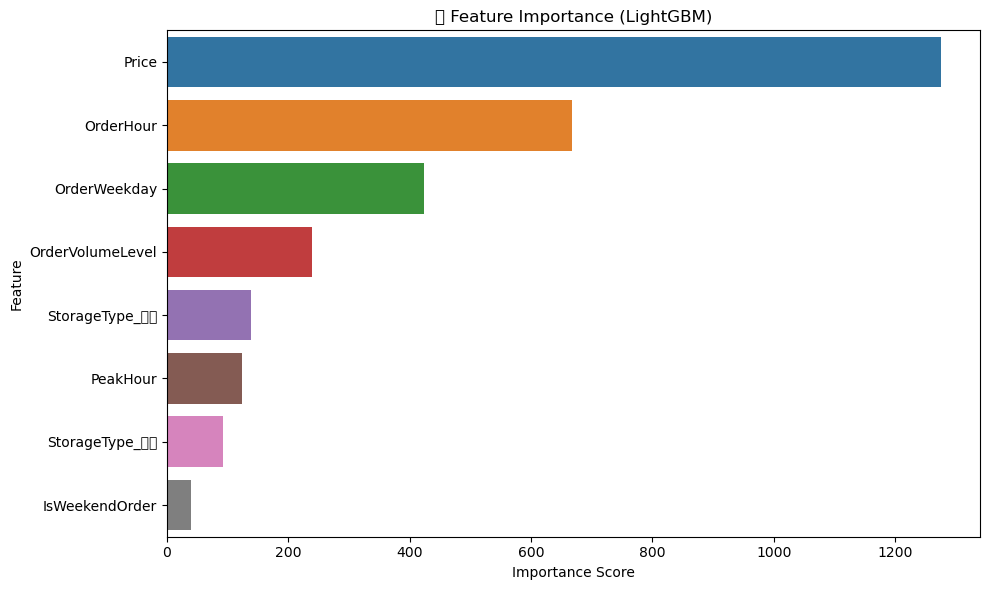

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.Series(lgbm_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp[:15], y=feature_imp[:15].index)
plt.title('💡 Feature Importance (LightGBM)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## XGBoost

In [68]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [69]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# DMatrix로 변환 (optional but 권장)
dtrain = xgb.DMatrix(X_train_smote, label=y_train_smote)
dval = xgb.DMatrix(X_val)

# 모델 파라미터 기본값
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'random_state': 42,
    'scale_pos_weight': 24  # 클래스 불균형 보정용 (정시:지연 비율)
}

# 모델 학습
bst = xgb.train(params, dtrain, num_boost_round=100)

# 예측
y_proba = bst.predict(dval)
y_pred = (y_proba >= 0.5).astype(int)


In [70]:
print("📊 Classification Report (XGBoost)")
print(classification_report(y_val, y_pred))

print("📉 Confusion Matrix")
print(confusion_matrix(y_val, y_pred))

print(f"🎯 ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")


📊 Classification Report (XGBoost)
              precision    recall  f1-score   support

           0       0.96      0.23      0.37     24714
           1       0.04      0.77      0.07      1001

    accuracy                           0.25     25715
   macro avg       0.50      0.50      0.22     25715
weighted avg       0.92      0.25      0.35     25715

📉 Confusion Matrix
[[ 5587 19127]
 [  233   768]]
🎯 ROC-AUC: 0.4926


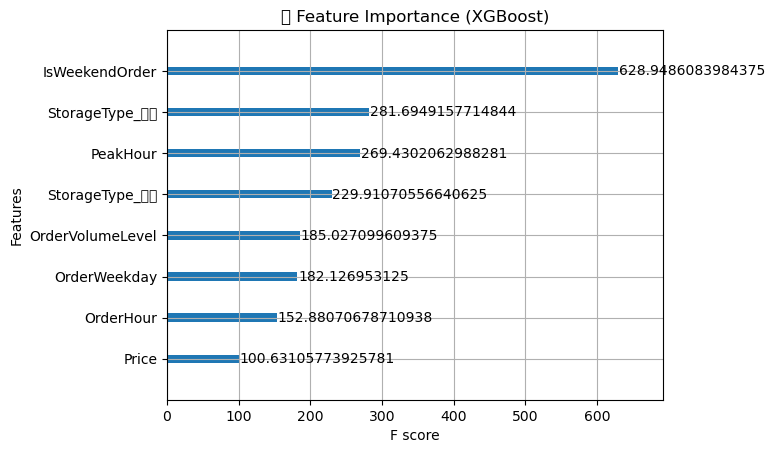

In [71]:
xgb.plot_importance(bst, max_num_features=15, importance_type='gain')
plt.title("📌 Feature Importance (XGBoost)")
plt.show()


## LightGBM 튜닝

In [72]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# LightGBM 모델
lgbm = lgb.LGBMClassifier(random_state=42)

# 파라미터 그리드
param_dist = {
    'num_leaves': [16, 32, 64, 128],
    'max_depth': [3, 5, 7, 10],
    'min_child_samples': [10, 20, 30, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'scale_pos_weight': [10, 15, 20, 25]
}

# 튜닝
rsearch = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=30,  # 실행 횟수 (늘릴수록 정확, 오래 걸림)
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# SMOTE 데이터 기준 학습
rsearch.fit(X_train_smote, y_train_smote)

# 결과
print("✅ Best Params:", rsearch.best_params_)
print("🎯 Best Score (F1):", rsearch.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
✅ Best Params: {'scale_pos_weight': 10, 'num_leaves': 128, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.1}
🎯 Best Score (F1): 0.7160900773112769


In [73]:
best_lgbm = rsearch.best_estimator_

# 예측
y_pred = best_lgbm.predict(X_val)
y_proba = best_lgbm.predict_proba(X_val)[:, 1]

# 평가
print("📊 Classification Report (Tuned LightGBM)")
print(classification_report(y_val, y_pred))
print("📉 Confusion Matrix")
print(confusion_matrix(y_val, y_pred))
print(f"🎯 ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")


📊 Classification Report (Tuned LightGBM)
              precision    recall  f1-score   support

           0       0.96      0.23      0.37     24714
           1       0.04      0.75      0.07      1001

    accuracy                           0.25     25715
   macro avg       0.50      0.49      0.22     25715
weighted avg       0.92      0.25      0.36     25715

📉 Confusion Matrix
[[ 5727 18987]
 [  246   755]]
🎯 ROC-AUC: 0.4938


지연예측 성능은 향상, 정시배송을 잘못 예측함

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

# 예측 확률 기반 Threshold 조정
thresholds = [0.3, 0.5, 0.6, 0.7, 0.8]

for t in thresholds:
    print(f"\n🎯 Threshold = {t}")
    y_pred_thresh = (y_proba >= t).astype(int)
    print(classification_report(y_val, y_pred_thresh, zero_division=0))
    print(confusion_matrix(y_val, y_pred_thresh))



🎯 Threshold = 0.3
              precision    recall  f1-score   support

           0       0.95      0.10      0.18     24714
           1       0.04      0.88      0.07      1001

    accuracy                           0.13     25715
   macro avg       0.50      0.49      0.13     25715
weighted avg       0.92      0.13      0.17     25715

[[ 2435 22279]
 [  117   884]]

🎯 Threshold = 0.5
              precision    recall  f1-score   support

           0       0.96      0.23      0.37     24714
           1       0.04      0.75      0.07      1001

    accuracy                           0.25     25715
   macro avg       0.50      0.49      0.22     25715
weighted avg       0.92      0.25      0.36     25715

[[ 5727 18987]
 [  246   755]]

🎯 Threshold = 0.6
              precision    recall  f1-score   support

           0       0.96      0.32      0.48     24714
           1       0.04      0.68      0.07      1001

    accuracy                           0.33     25715
   macro 

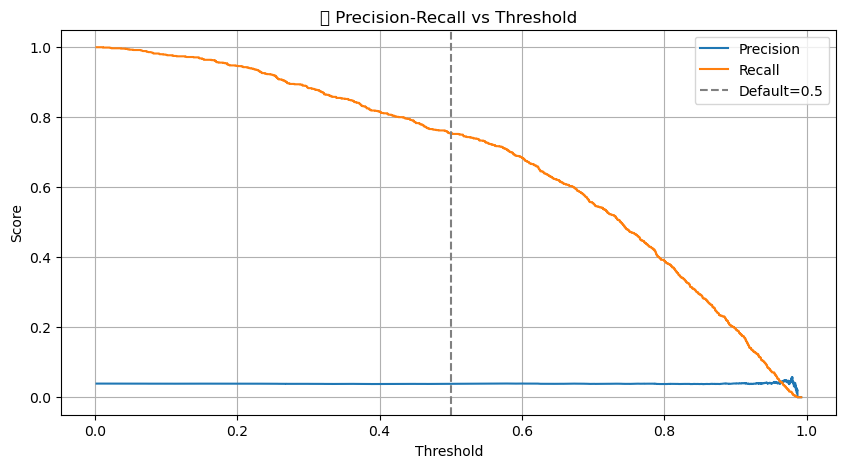

In [76]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, threshold_vals = precision_recall_curve(y_val, y_proba)

plt.figure(figsize=(10,5))
plt.plot(threshold_vals, precision[:-1], label='Precision')
plt.plot(threshold_vals, recall[:-1], label='Recall')
plt.axvline(0.5, color='gray', linestyle='--', label='Default=0.5')
plt.title("📈 Precision-Recall vs Threshold")
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


배송 지연을 설명해줄 피처가 거의 없음
현재 피처:

- 시간 정보 (주문 시각, 요일, 피크시간)

- 상품군 정보 (냉동/냉장/상온)

- 전체 주문 수량

물류 상황, 지역 정보, 라이더 수, 날씨, 거리 정보 없음 → 핵심 변수들 부재

## 배송지연 예측에 필요한 핵심 정보 부족으로 모델링 한계

In [82]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# ✅ 나눔고딕 폰트 설정 (우분투)
plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False


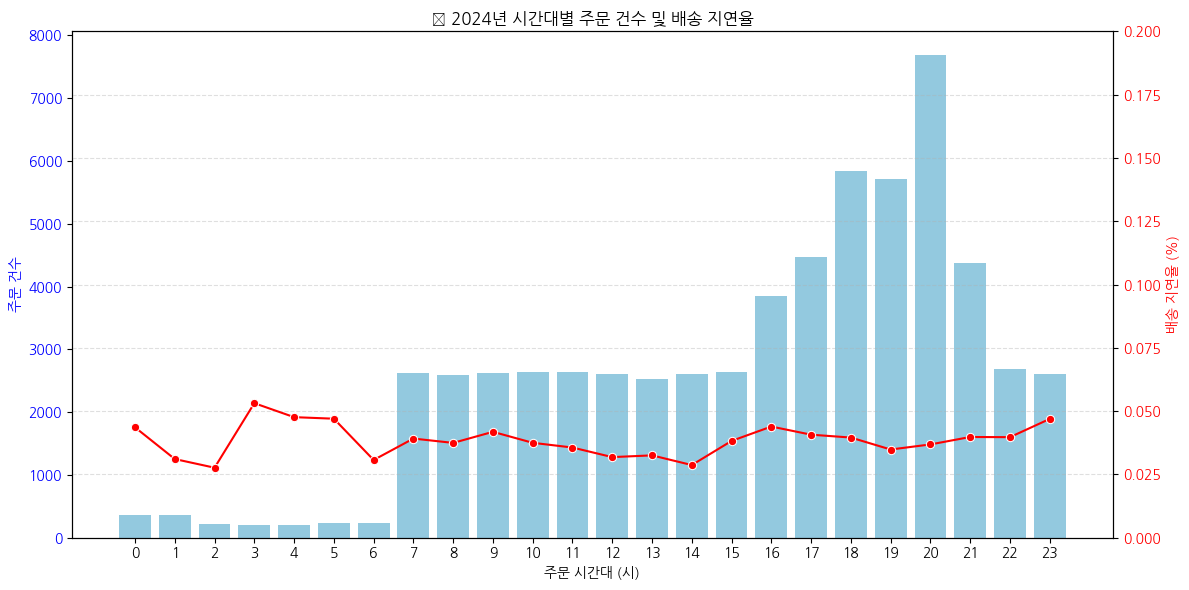

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2024년 데이터 필터링
df_2024 = df_order[df_order['OrderDT'].dt.year == 2024].copy()
df_2024['OrderHour'] = df_2024['OrderDT'].dt.hour  # 시간 추출

# 2. 시간대별 주문 수 / 지연률 집계
hourly_summary = df_2024.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # 평균이 곧 지연률
).reset_index()

# 3. 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문건수: 막대그래프
sns.barplot(x='OrderHour', y='OrderCount', data=hourly_summary, ax=ax1, color='skyblue')
ax1.set_ylabel('주문 건수', color='blue')
ax1.set_xlabel('주문 시간대 (시)')
ax1.tick_params(axis='y', labelcolor='blue')

# 지연율: 선그래프 (2차축)
ax2 = ax1.twinx()
sns.lineplot(x='OrderHour', y='DelayRate', data=hourly_summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('배송 지연율 (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)  # 100% 기준

# 제목 및 그리드
plt.title('🕒 2024년 시간대별 주문 건수 및 배송 지연율')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


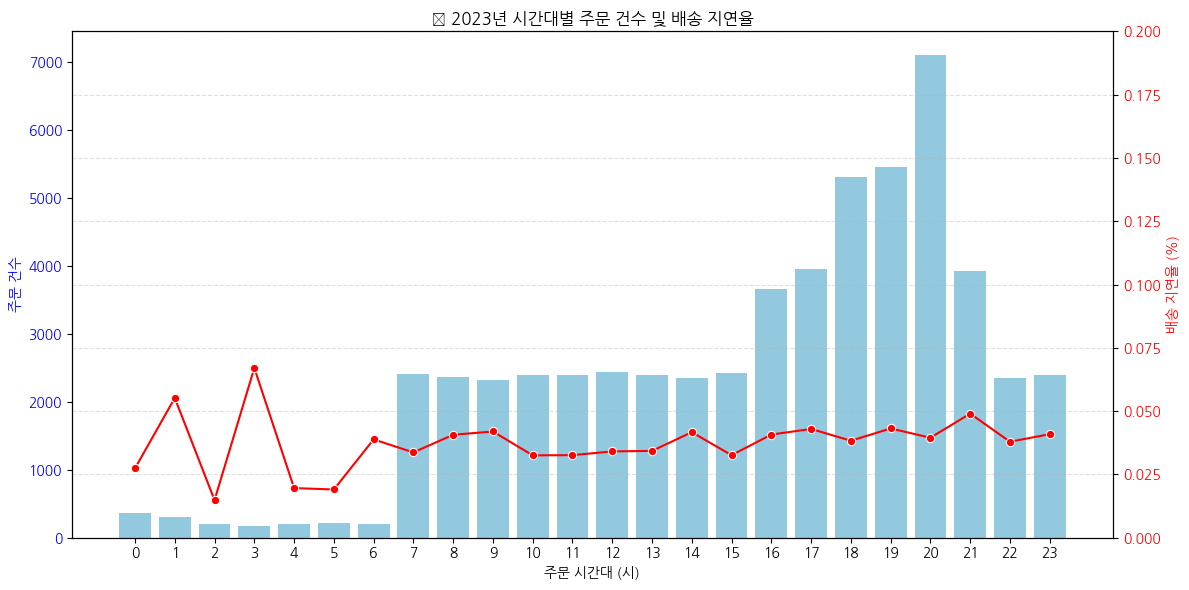

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2023년 데이터 필터링
df_2023 = df_order[df_order['OrderDT'].dt.year == 2023].copy()
df_2023['OrderHour'] = df_2023['OrderDT'].dt.hour  # 시간 추출
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2023년 데이터 필터링
df_2023 = df_order[df_order['OrderDT'].dt.year == 2023].copy()
df_2023['OrderHour'] = df_2023['OrderDT'].dt.hour  # 시간 추출

# 2. 시간대별 주문 수 / 지연률 집계
hourly_summary = df_2023.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # 평균이 곧 지연률
).reset_index()

# 3. 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문건수: 막대그래프
sns.barplot(x='OrderHour', y='OrderCount', data=hourly_summary, ax=ax1, color='skyblue')
ax1.set_ylabel('주문 건수', color='blue')
ax1.set_xlabel('주문 시간대 (시)')
ax1.tick_params(axis='y', labelcolor='blue')

# 지연율: 선그래프 (2차축)
ax2 = ax1.twinx()
sns.lineplot(x='OrderHour', y='DelayRate', data=hourly_summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('배송 지연율 (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)  # 100% 기준

# 제목 및 그리드
plt.title('🕒 2023년 시간대별 주문 건수 및 배송 지연율')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 2. 시간대별 주문 수 / 지연률 집계
hourly_summary = df_2023.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # 평균이 곧 지연률
).reset_index()

# 3. 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문건수: 막대그래프
sns.barplot(x='OrderHour', y='OrderCount', data=hourly_summary, ax=ax1, color='skyblue')
ax1.set_ylabel('주문 건수', color='blue')
ax1.set_xlabel('주문 시간대 (시)')
ax1.tick_params(axis='y', labelcolor='blue')

# 지연율: 선그래프 (2차축)
ax2 = ax1.twinx()
sns.lineplot(x='OrderHour', y='DelayRate', data=hourly_summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('배송 지연율 (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)  # 100% 기준

# 제목 및 그리드
plt.title('🕒 2023년 시간대별 주문 건수 및 배송 지연율')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


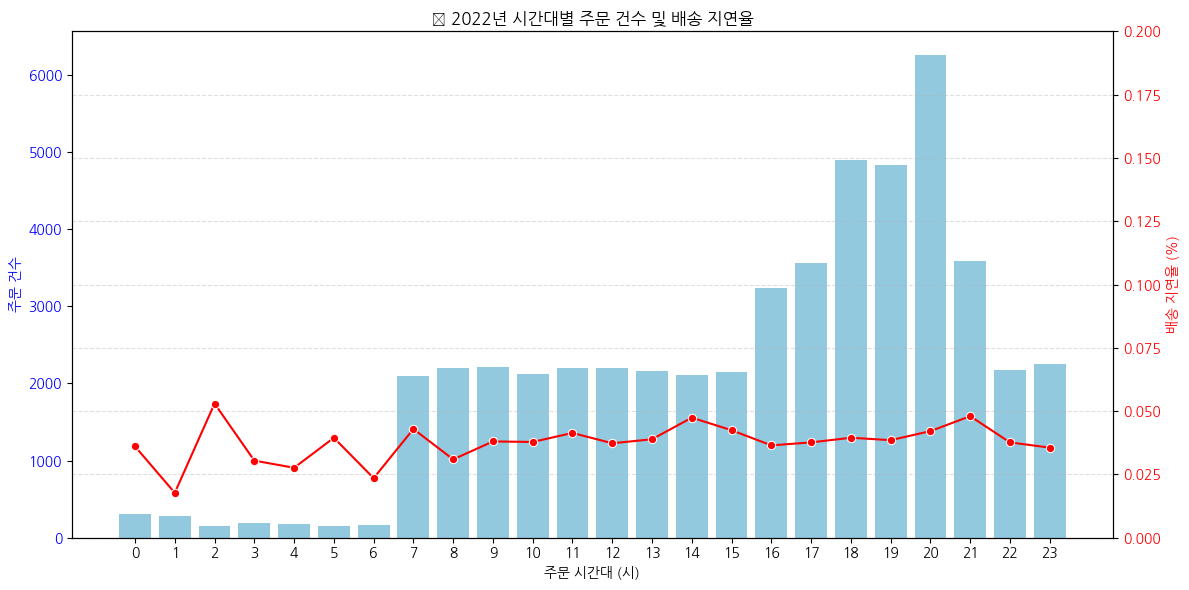

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2022년 데이터 필터링
df_2022 = df_order[df_order['OrderDT'].dt.year == 2022].copy()
df_2022['OrderHour'] = df_2022['OrderDT'].dt.hour  # 시간 추출

# 2. 시간대별 주문 수 / 지연률 집계
hourly_summary = df_2022.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # 평균이 곧 지연률
).reset_index()

# 3. 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2023년 데이터 필터링
df_2023 = df_order[df_order['OrderDT'].dt.year == 2023].copy()
df_2023['OrderHour'] = df_2023['OrderDT'].dt.hour  # 시간 추출

# 2. 시간대별 주문 수 / 지연률 집계
hourly_summary = df_2023.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # 평균이 곧 지연률
).reset_index()

# 3. 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문건수: 막대그래프
sns.barplot(x='OrderHour', y='OrderCount', data=hourly_summary, ax=ax1, color='skyblue')
ax1.set_ylabel('주문 건수', color='blue')
ax1.set_xlabel('주문 시간대 (시)')
ax1.tick_params(axis='y', labelcolor='blue')

# 지연율: 선그래프 (2차축)
ax2 = ax1.twinx()
sns.lineplot(x='OrderHour', y='DelayRate', data=hourly_summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('배송 지연율 (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)  # 100% 기준

# 제목 및 그리드
plt.title('🕒 2023년 시간대별 주문 건수 및 배송 지연율')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

ax1.set_xlabel('주문 시간대 (시)')
ax1.tick_params(axis='y', labelcolor='blue')

# 지연율: 선그래프 (2차축)
ax2 = ax1.twinx()import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2023년 데이터 필터링
df_2023 = df_order[df_order['OrderDT'].dt.year == 2023].copy()
df_2023['OrderHour'] = df_2023['OrderDT'].dt.hour  # 시간 추출

# 2. 시간대별 주문 수 / 지연률 집계
hourly_summary = df_2023.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # 평균이 곧 지연률
).reset_index()

# 3. 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문건수: 막대그래프
sns.barplot(x='OrderHour', y='OrderCount', data=hourly_summary, ax=ax1, color='skyblue')
ax1.set_ylabel('주문 건수', color='blue')
ax1.set_xlabel('주문 시간대 (시)')
ax1.tick_params(axis='y', labelcolor='blue')

# 지연율: 선그래프 (2차축)
ax2 = ax1.twinx()
sns.lineplot(x='OrderHour', y='DelayRate', data=hourly_summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('배송 지연율 (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)  # 100% 기준

# 제목 및 그리드
plt.title('🕒 2023년 시간대별 주문 건수 및 배송 지연율')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

ax2.set_ylim(0, 0.2)  # 100% 기준

# 제목 및 그리드
plt.title('🕒 2022년 시간대별 주문 건수 및 배송 지연율')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [87]:
df_order['Year'] = df_order['OrderDT'].dt.year
df_order['Hour'] = df_order['OrderDT'].dt.hour

# 시간대-연도별 집계
hourly_by_year = df_order.groupby(['Year', 'Hour']).agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')
).reset_index()


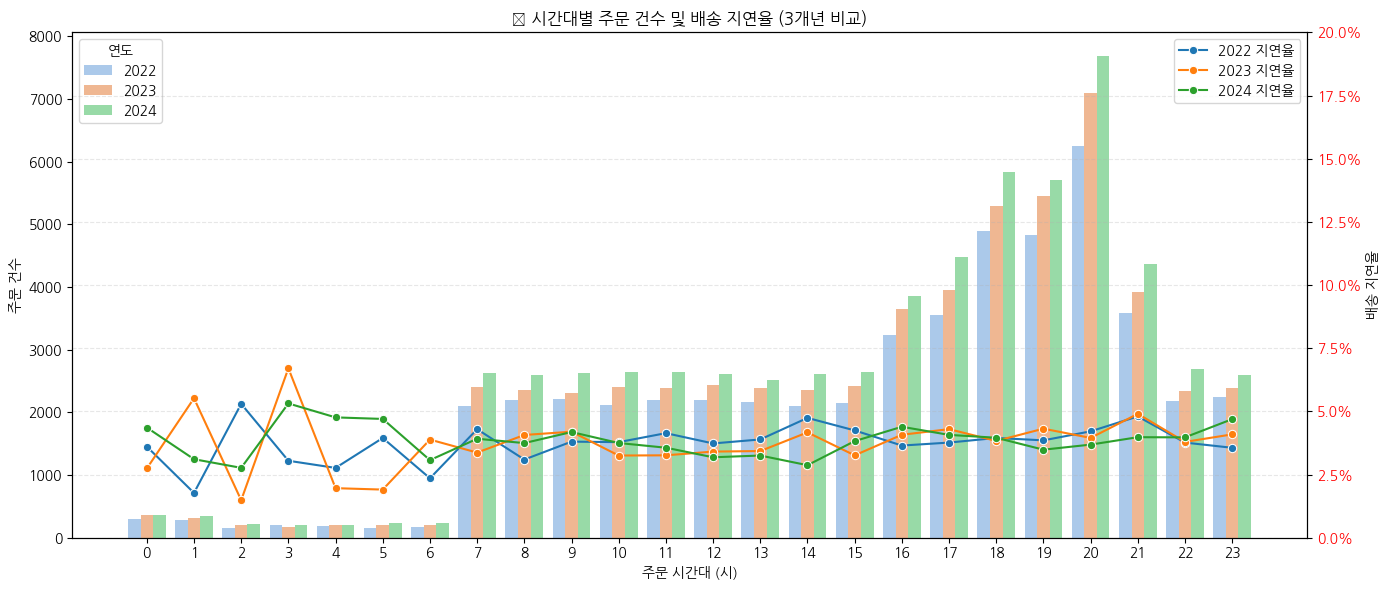

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 한글 폰트 설정 (우분투)
plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 6))

# 막대그래프: 시간대별 총 주문수 (stacked가 아닌 year별 색상 구분)
sns.barplot(
    x='Hour', y='OrderCount', hue='Year',
    data=hourly_by_year,
    ax=ax1,
    palette='pastel'
)
ax1.set_ylabel('주문 건수')
ax1.set_xlabel('주문 시간대 (시)')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(title='연도', loc='upper left')

# 선 그래프용 축
ax2 = ax1.twinx()

# 선그래프: 연도별 지연율
for year in sorted(hourly_by_year['Year'].unique()):
    temp = hourly_by_year[hourly_by_year['Year'] == year]
    sns.lineplot(
        x='Hour', y='DelayRate',
        data=temp,
        ax=ax2,
        marker='o',
        label=f"{year} 지연율"
    )

ax2.set_ylabel('배송 지연율')
ax2.set_ylim(0, 0.2)
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1.0))

plt.title("🕒 시간대별 주문 건수 및 배송 지연율 (3개년 비교)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## 주문건수 + 지연건수

In [89]:
df_order['Year'] = df_order['OrderDT'].dt.year
df_order['Hour'] = df_order['OrderDT'].dt.hour

# 시간대-연도별 집계 (지연건수 추가)
hourly_by_year = df_order.groupby(['Year', 'Hour']).agg(
    OrderCount=('idOrder', 'count'),
    DelayCount=('LateYN', 'sum')  # 지연된 주문 수
).reset_index()


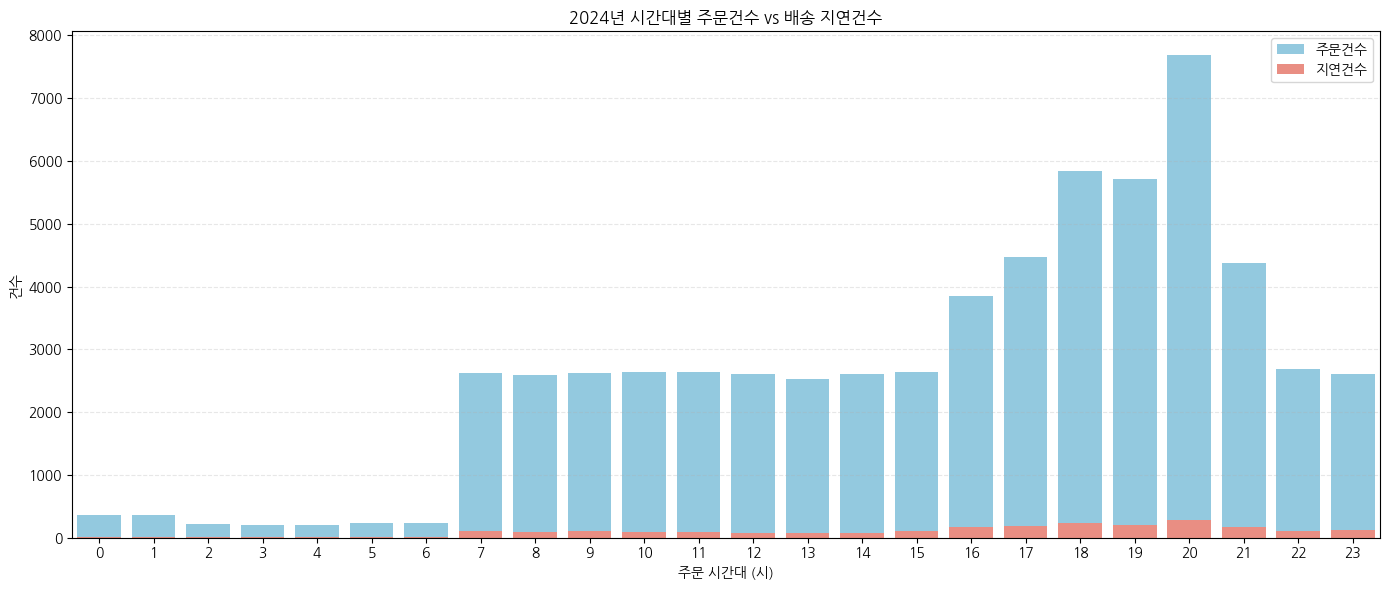

In [90]:
plt.figure(figsize=(14,6))
sns.barplot(x='Hour', y='OrderCount', data=hourly_by_year[hourly_by_year['Year']==2024], color='skyblue', label='주문건수')
sns.barplot(x='Hour', y='DelayCount', data=hourly_by_year[hourly_by_year['Year']==2024], color='salmon', label='지연건수')

plt.title("2024년 시간대별 주문건수 vs 배송 지연건수")
plt.xlabel("주문 시간대 (시)")
plt.ylabel("건수")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### 오후 16시~21시 → 주문량 + 지연건수 모두 집중
20시에 피크 (주문건수 거의 8,000건)

이 시간대는 지연건수도 눈에 띄게 많음

✅ 배송 지연에 실질적으로 가장 큰 영향을 주는 시간대

➡️ 운영 리소스(라이더, 센터 인력, 차량) 집중 배치 필요



In [91]:
df_order['Weekday'] = df_order['OrderDT'].dt.day_name(locale='en_US.utf8')  # 요일 이름 (영어)
df_order['Hour'] = df_order['OrderDT'].dt.hour

# 요일-시간대별 집계
hourly_by_weekday = df_order.groupby(['Weekday', 'Hour']).agg(
    OrderCount=('idOrder', 'count'),
    DelayCount=('LateYN', 'sum')
).reset_index()


In [92]:
from pandas.api.types import CategoricalDtype

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=weekday_order, ordered=True)
hourly_by_weekday['Weekday'] = hourly_by_weekday['Weekday'].astype(cat_type)


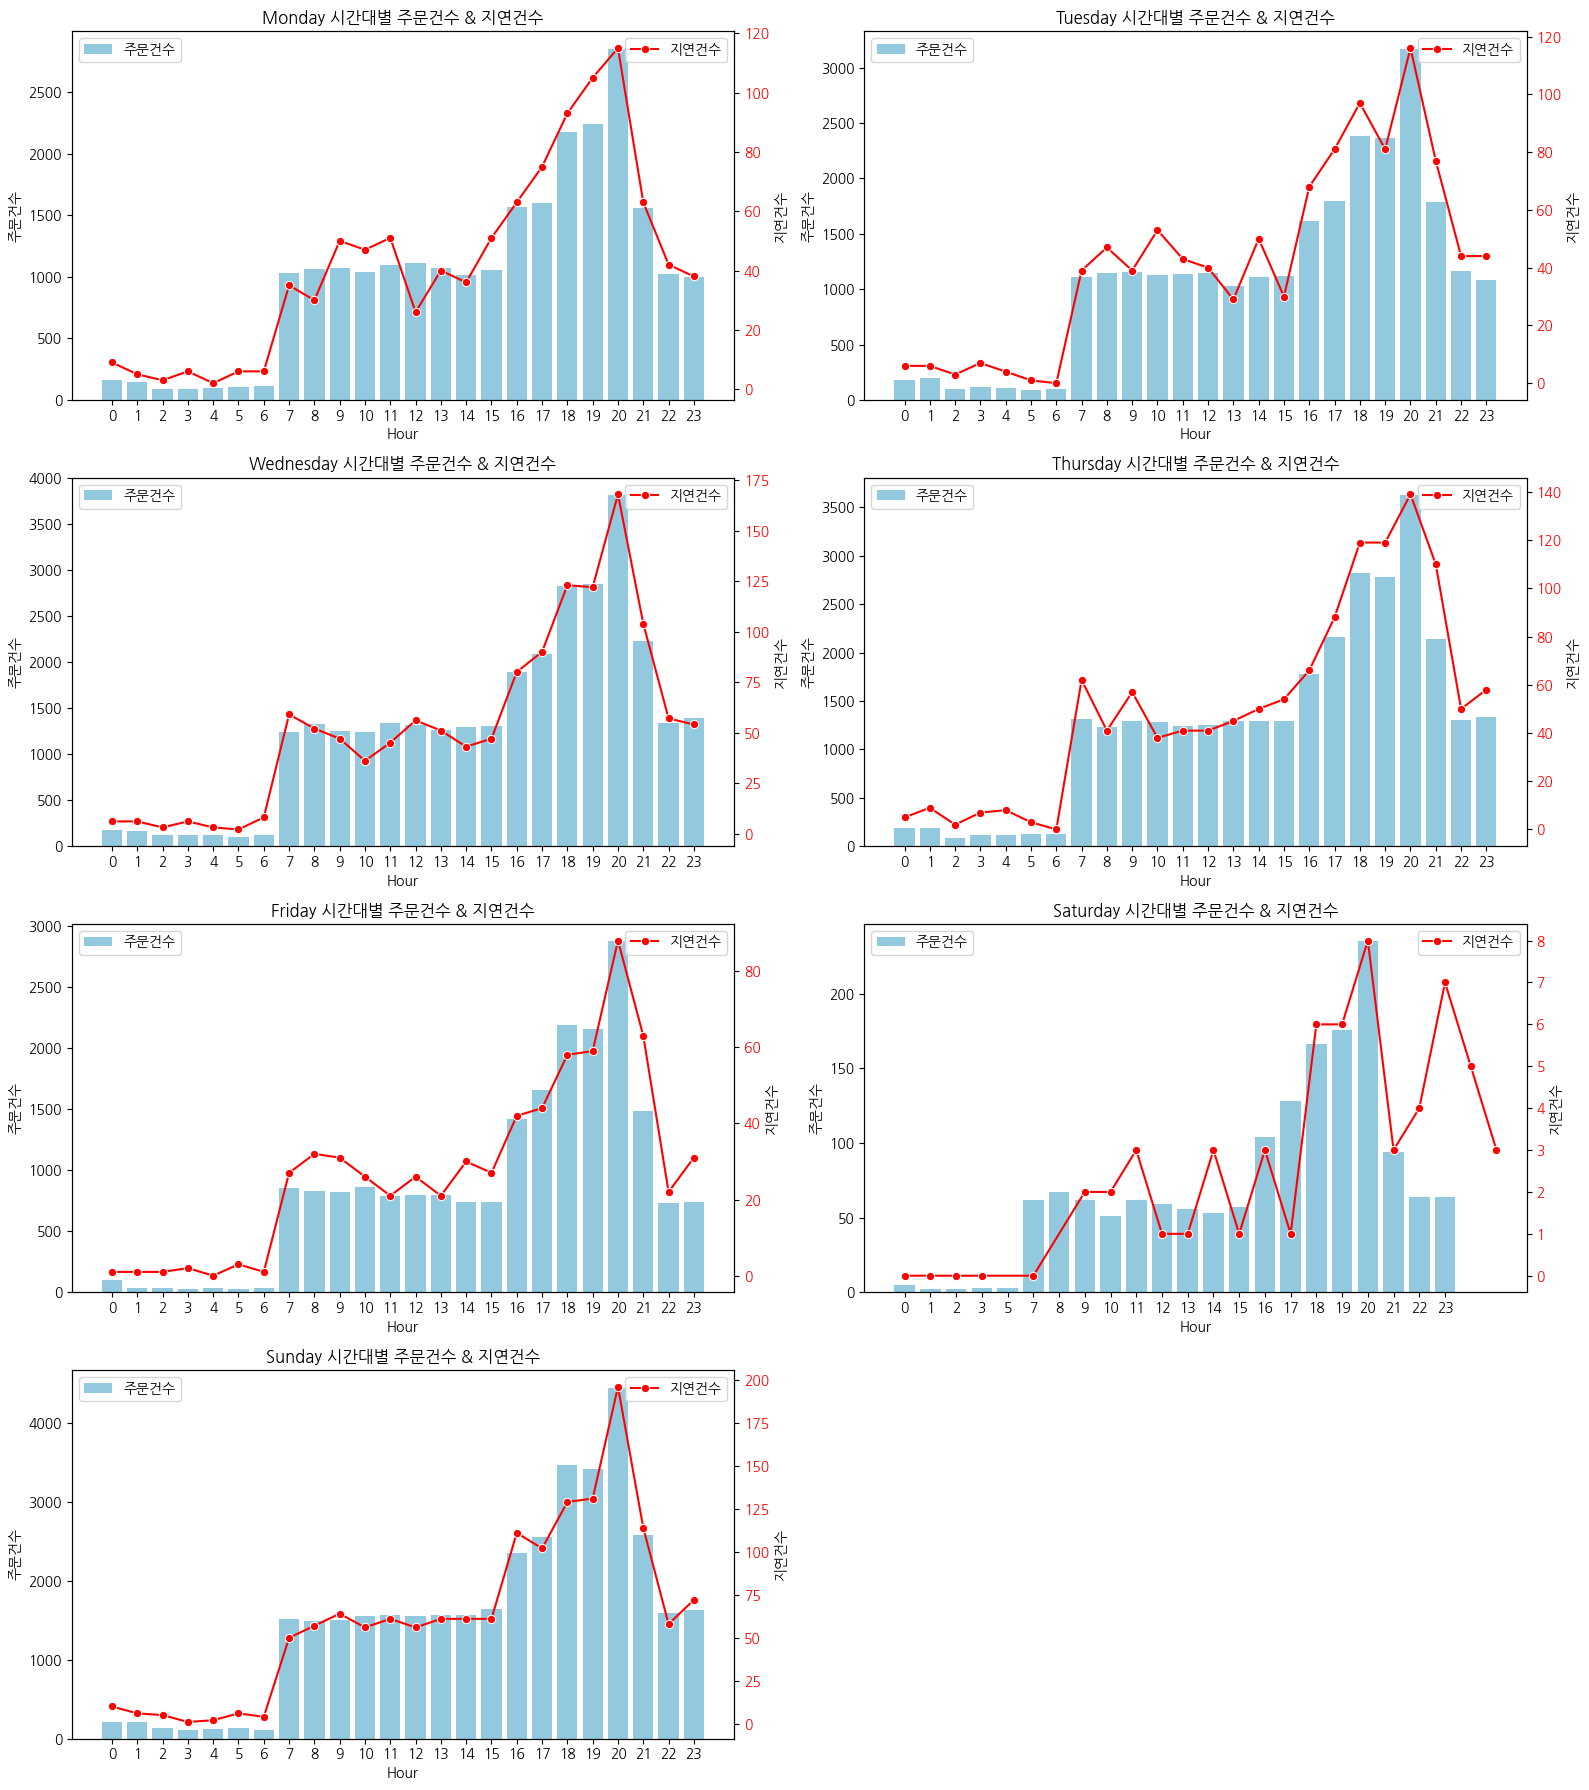

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 한글폰트 (우분투)
plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
axes = axes.flatten()

for i, day in enumerate(weekday_order):
    temp = hourly_by_weekday[hourly_by_weekday['Weekday'] == day]
    ax = axes[i]

    # 주문건수 막대
    sns.barplot(x='Hour', y='OrderCount', data=temp, ax=ax, color='skyblue', label='주문건수')

    # 지연건수 선그래프
    ax2 = ax.twinx()
    sns.lineplot(x='Hour', y='DelayCount', data=temp, ax=ax2, color='red', marker='o', label='지연건수')

    ax.set_title(f"{day} 시간대별 주문건수 & 지연건수")
    ax.set_ylabel('주문건수')
    ax2.set_ylabel('지연건수')
    ax2.tick_params(axis='y', labelcolor='red')

    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# 마지막 빈 subplot 제거
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


In [94]:
# 요일 정렬
from pandas.api.types import CategoricalDtype

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=weekday_order, ordered=True)
df_order['Weekday'] = df_order['OrderDT'].dt.day_name(locale='en_US.utf8').astype(cat_type)
df_order['Hour'] = df_order['OrderDT'].dt.hour

# 피벗 테이블 (지연건수 기준)
heatmap_data = df_order.pivot_table(
    index='Weekday',
    columns='Hour',
    values='LateYN',
    aggfunc='sum',  # → 시간대별 지연 건수 총합
    fill_value=0
)


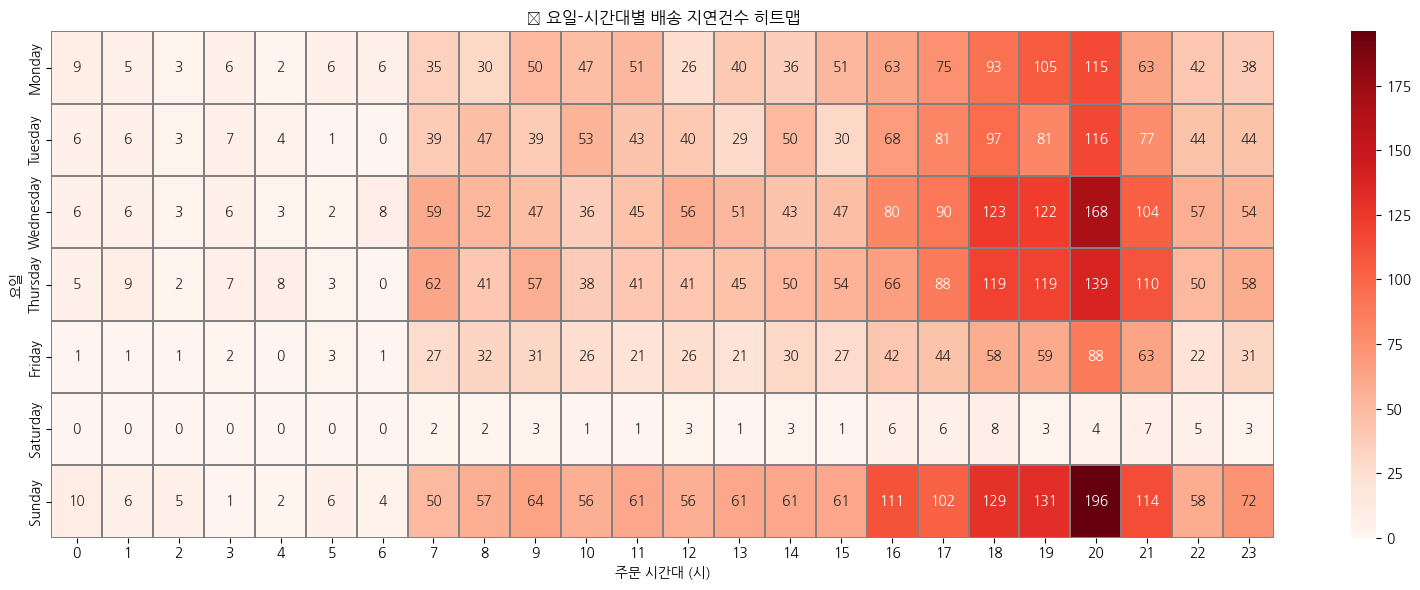

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 한글 폰트 (우분투용)
plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화
plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='Reds',
    linewidths=0.3,
    linecolor='gray'
)

plt.title('📍 요일-시간대별 배송 지연건수 히트맵')
plt.xlabel('주문 시간대 (시)')
plt.ylabel('요일')
plt.tight_layout()
plt.show()


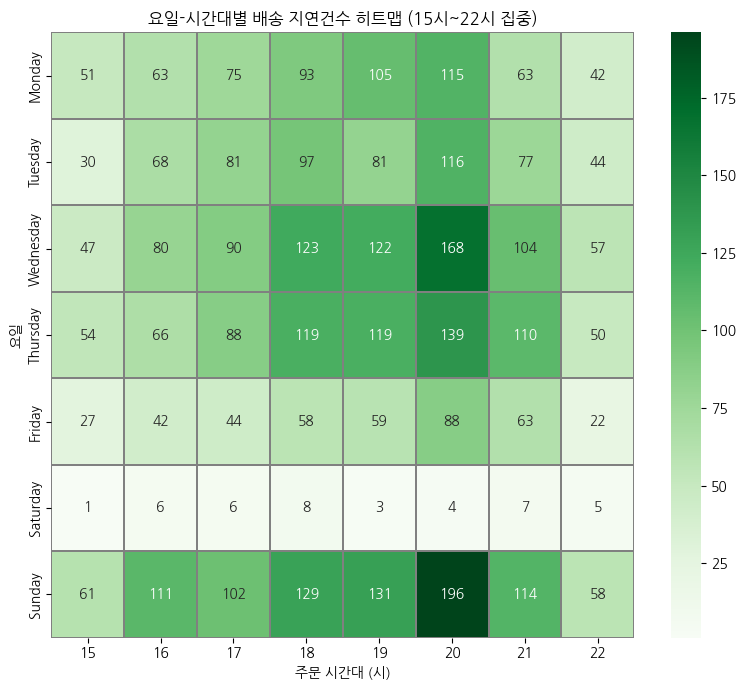

In [105]:
# ▶️ 기존 피벗테이블에서 원하는 시간대만 추출 (15시~22시)
heatmap_focus = heatmap_data.loc[:, 15:22]

# ▶️ 시각화
plt.figure(figsize=(8, 7))
sns.heatmap(
    heatmap_focus,
    annot=True,
    fmt='.0f',
    cmap='Greens',
    linewidths=0.3,
    linecolor='gray'
)

plt.title('요일-시간대별 배송 지연건수 히트맵 (15시~22시 집중)')
plt.xlabel('주문 시간대 (시)')
plt.ylabel('요일')
plt.tight_layout()
plt.show()


## "수일요일 1821시"는 배송 지연 대응 최우선 구간
이 시간대만 잡아도 전체 지연의 약 30% 해소 가능

In [99]:
# 1. 전체 지연 건수
total_delay = df_order['LateYN'].sum()

# 2. 대상 필터링: 수요일~일요일 + 18시~21시
target_days = ['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_order['Weekday'] = df_order['OrderDT'].dt.day_name(locale='en_US.utf8')
df_order['Hour'] = df_order['OrderDT'].dt.hour

target_delay = df_order[
    (df_order['Weekday'].isin(target_days)) &
    (df_order['Hour'].between(18, 21))
]['LateYN'].sum()

# 3. 비율 계산 (%)
contribution_rate = target_delay / total_delay * 100

print(f"🎯 수~일요일 18~21시 지연건수 비중: {contribution_rate:.2f}%")


🎯 수~일요일 18~21시 지연건수 비중: 27.94%


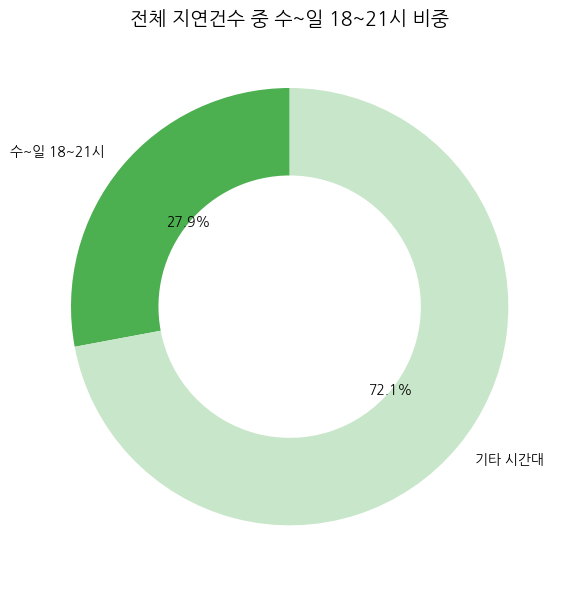

In [102]:
import matplotlib.pyplot as plt

# 값 준비
labels = ['수~일 18~21시', '기타 시간대']
values = [target_delay, total_delay - target_delay]
colors = ['#4CAF50', '#C8E6C9']  # 초록 계열

# 그래프
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})

plt.title('전체 지연건수 중 수~일 18~21시 비중', fontsize=14)
plt.tight_layout()
plt.show()


 깔끔하게 사실 전달:

 수일요일 1821시는 전체 배송 지연의 약 **28%**가 집중되는 구간입니다.

 대안 2: 전략 강조형:

전체 배송 지연의 4건 중 1건 이상이 수일요일 1821시에 발생합니다.
이 구간에 운영 리소스를 집중하면 효율적으로 지연을 줄일 수 있습니다.

대안 3: UX 관점 포함:

지연 발생 비중이 높은 **수일요일 저녁 시간대(1821시)**에는
고객 대상 안내 메시지 강화 또는 배송 마감 UX가 필요합니다.

### 개선방안?

라이더 인력 2명 더 배정

차량 1대 추가 임대

당일 피킹 작업 인원 조정

20시 전 자동화 설비 작업 속도 업

SLA 변경 → 유입 분산